In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC


### 1.Analyse the data using the visualizations

In [2]:
data = pd.read_csv("Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
# Quick look at the data

In [4]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
# Visualization Examples

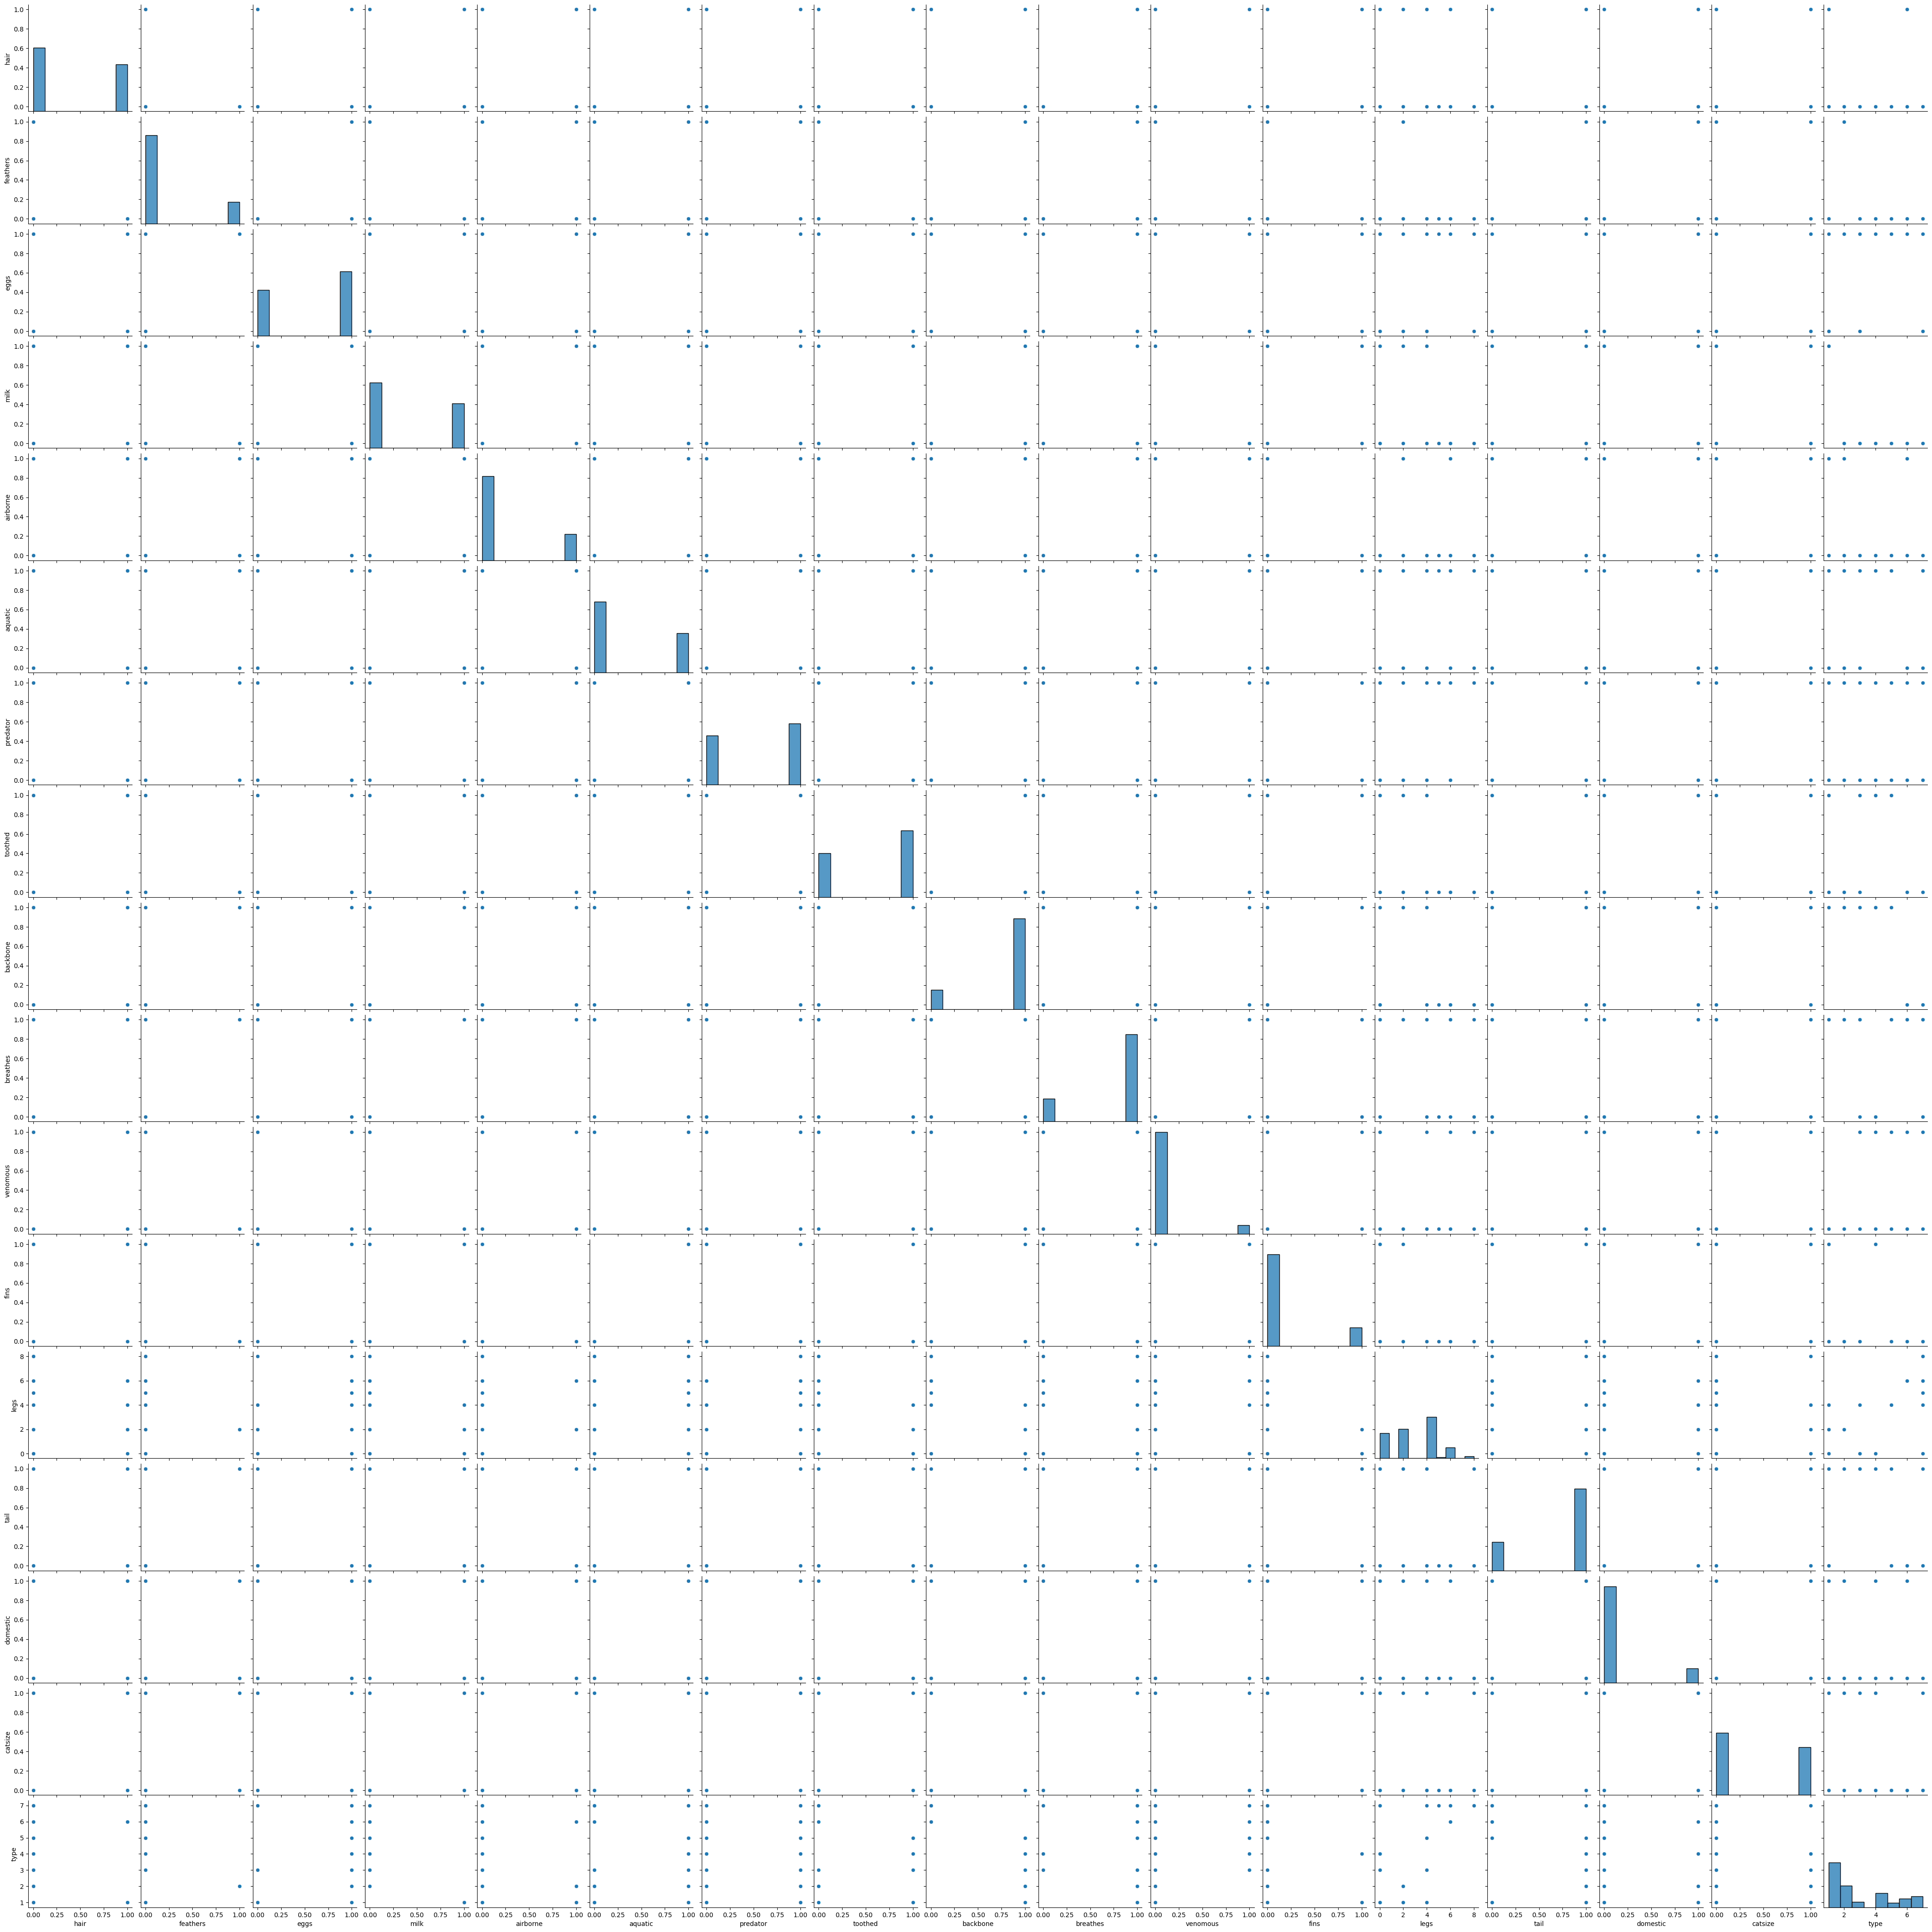

In [8]:
sns.pairplot(data)

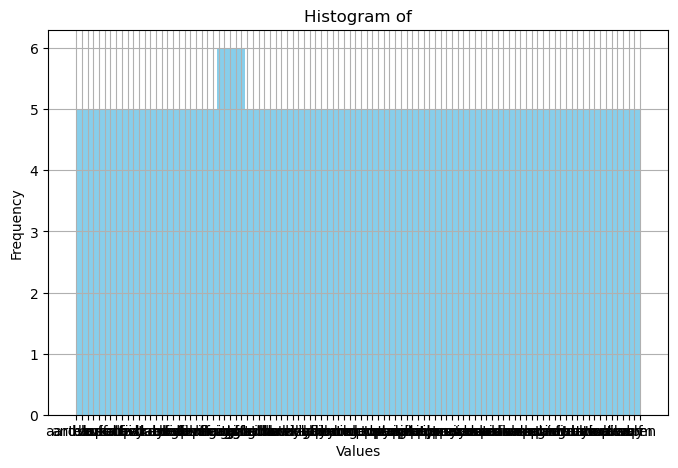

In [9]:
# 1. Histogram of a numerical column
plt.figure(figsize=(8, 5))
data['animal name'].hist(bins=20, color='skyblue')
plt.title('Histogram of')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

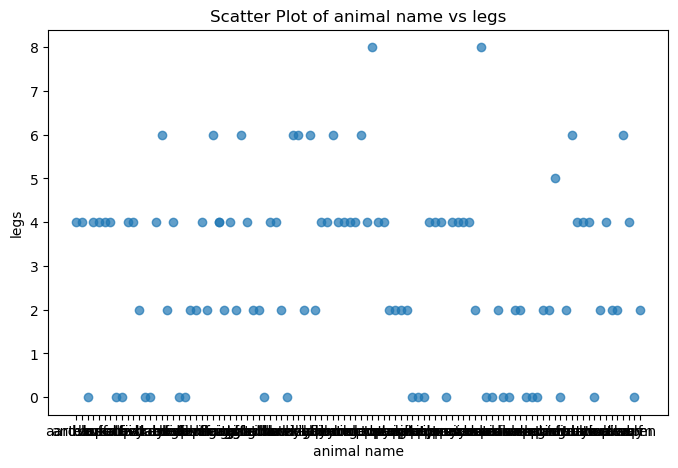

In [10]:
# 2. Scatter plot of two columns
plt.figure(figsize=(8, 5))
plt.scatter(data['animal name'], data['legs'], alpha=0.7)
plt.title('Scatter Plot of animal name vs legs')
plt.xlabel('animal name')
plt.ylabel('legs')
plt.show()

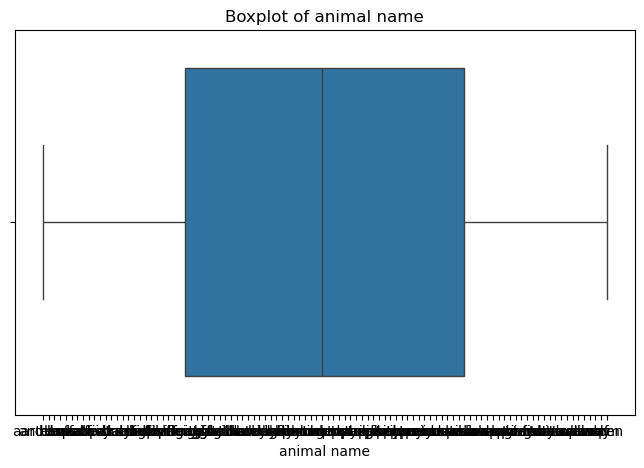

In [12]:
# 3. Boxplot for outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['animal name'])
plt.title('Boxplot of animal name')
plt.show()

In [14]:
pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



# Step 2: Preprocess the data

In [15]:
# Step 1: Handle Missing Values
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [16]:
# Option 1: Drop rows with missing values
data_cleaned = data.dropna()
data_cleaned

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [17]:
# Option 2: Fill missing values with mean, median, or mode (as appropriate)
# For numerical columns
data.fillna(data)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# For categorical columns
for col in data.select_dtypes(include=['object']):
    data[col].fillna(data[col].mode()[0], inplace=True)


In [20]:
# Step 2: Detect and Handle Outliers
# Visualize outliers using boxplots
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

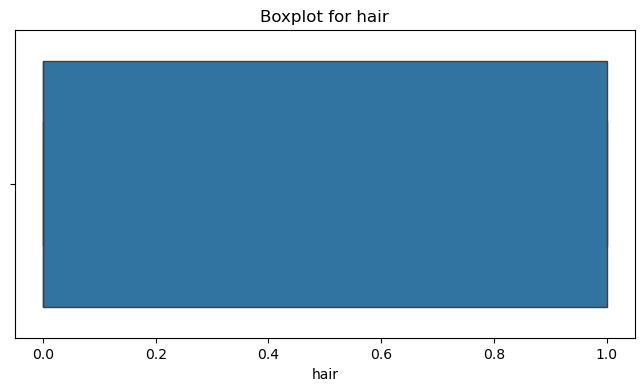

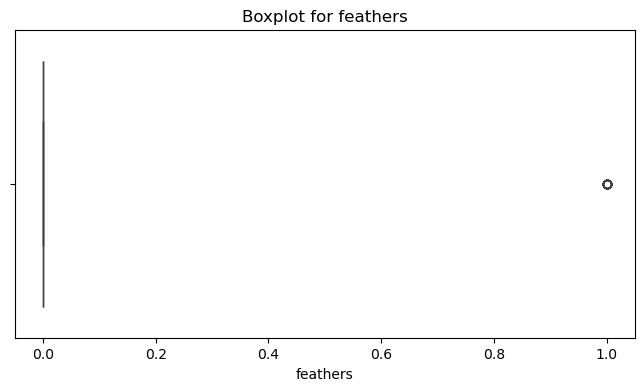

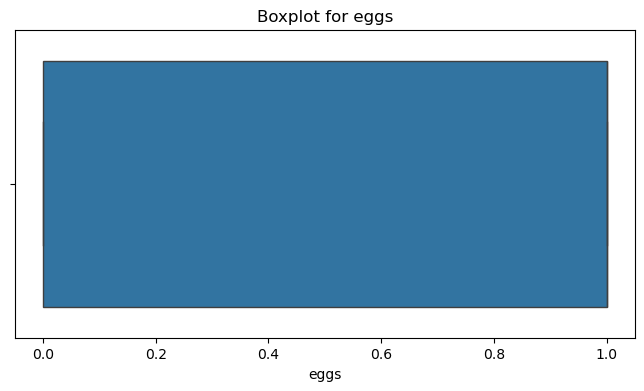

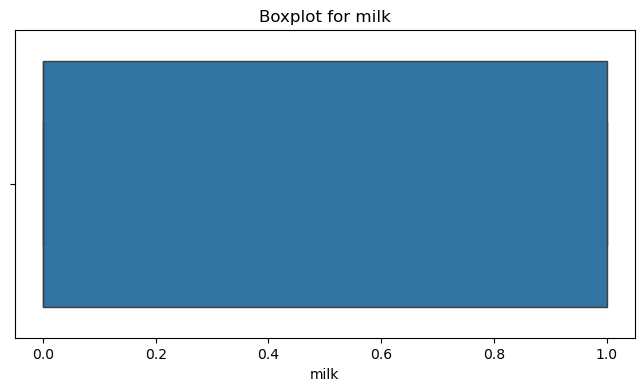

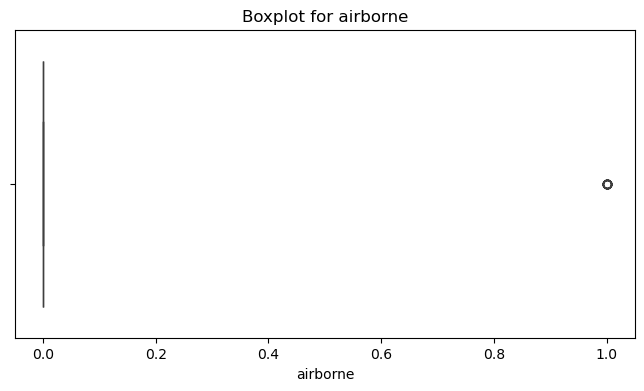

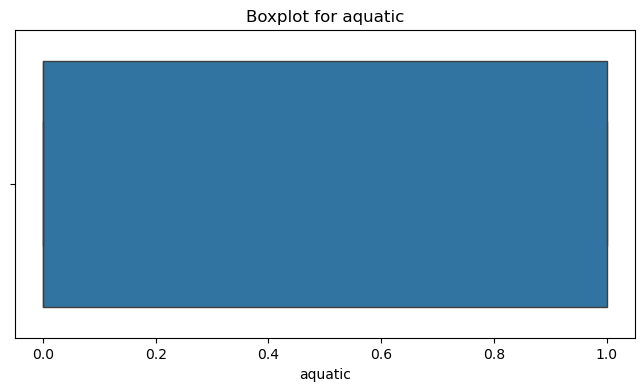

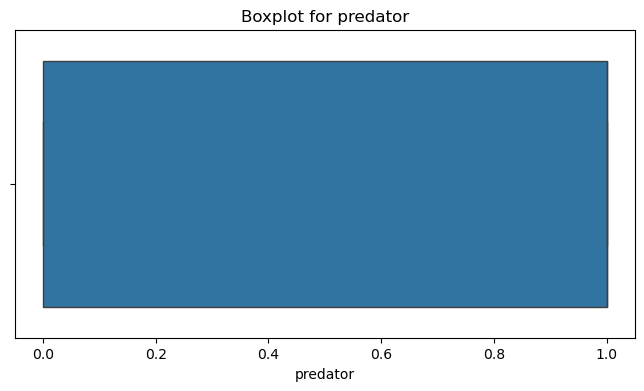

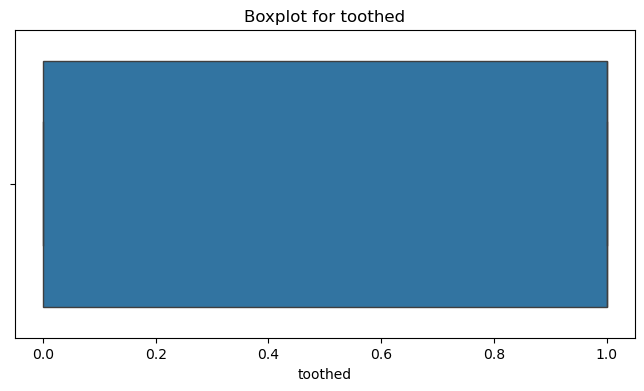

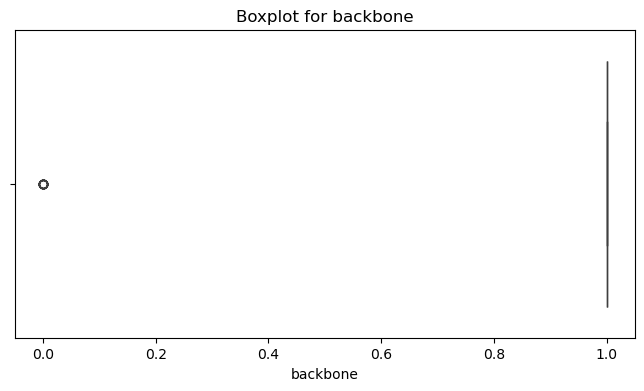

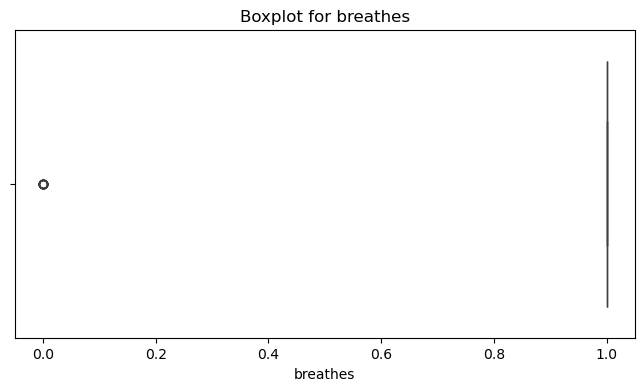

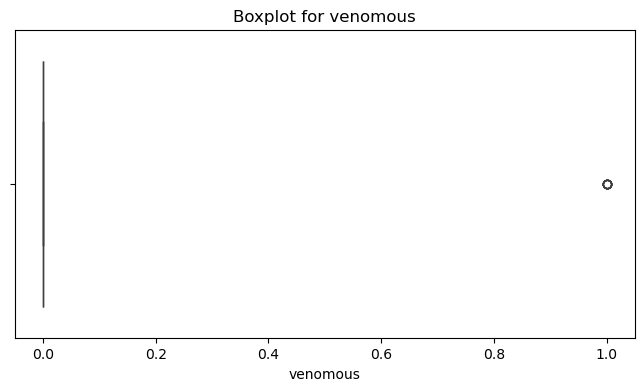

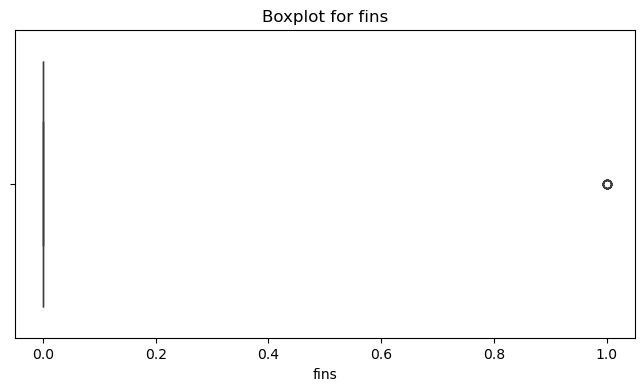

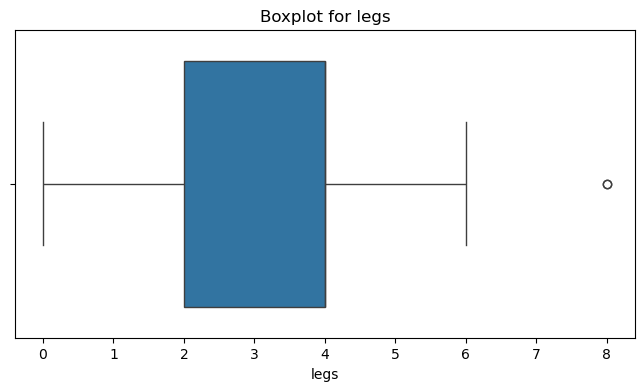

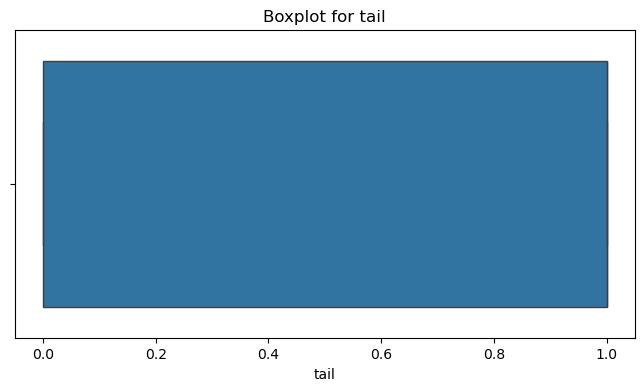

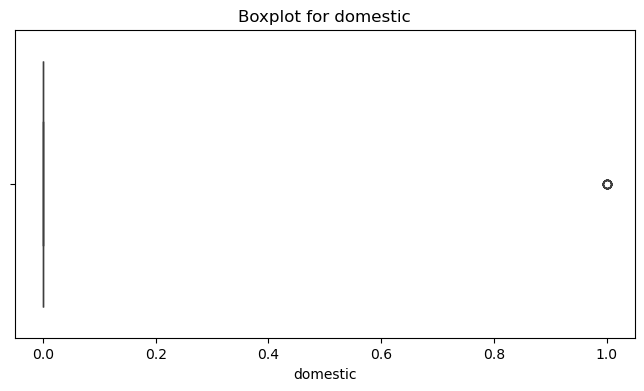

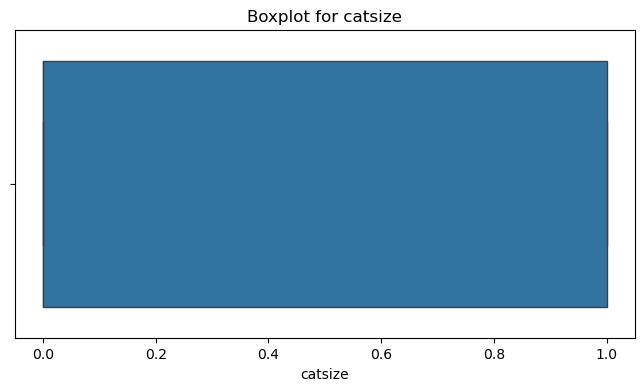

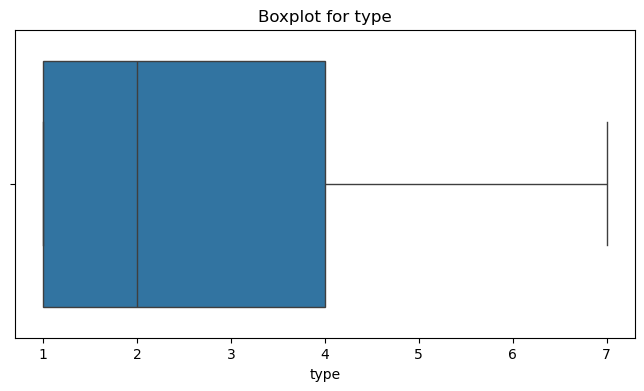

In [21]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [22]:
# Remove or cap outliers using the IQR method
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [23]:
Q1

1.0

In [24]:
Q3

4.0

In [25]:
IQR

3.0

In [26]:
upper_bound

8.5

In [27]:
lower_bound 

-3.5

In [28]:
 # Option 1: Remove outliers
df=[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
df

[0      True
 1      True
 2      True
 3      True
 4      True
        ... 
 96     True
 97     True
 98     True
 99     True
 100    True
 Name: type, Length: 101, dtype: bool]

In [29]:
# Handle outliers (e.g., using IQR or Z-score)

In [30]:
scaler = StandardScaler()
scaler

StandardScaler()

In [31]:
features = data.drop("animal name", axis=1)
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [32]:
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  0.55839574],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  1.99224243],
       [-0.86103386,  2.01246118,  0.84372057, ..., -0.38435306,
        -0.87859537, -0.39750205]])

In [33]:
target=data['animal name']
target

0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: object

# Step 3: Split the dataset

In [34]:
# Split the dataset (80% training, 20% testing)
x_train,x_test,y_train,y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
x_train,x_test,y_train,y_test

(array([[-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
         -0.87859537,  1.03634464],
        [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
         -0.87859537,  1.03634464],
        [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
         -0.87859537,  1.51429354],
        ...,
        [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
         -0.87859537,  1.99224243],
        [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
          1.13818037,  0.55839574],
        [ 1.16139451, -0.49690399,  0.84372057, ..., -0.38435306,
         -0.87859537,  1.51429354]]),
 array([[ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
         -0.74420841, -1.1155467 ,  0.80977633,  0.46569032,  0.51234754,
         -0.29329423, -0.44986771, -0.41594766,  0.58878406, -0.38435306,
         -0.87859537, -0.87545095],
        [ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
         -0.74420841, -1.1155467 ,  0.809

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 17)
(21, 17)
(80,)
(21,)


# Step 4: Train KNN

In [36]:
# Initialize the KNN model
# You can tune the n_neighbors parameter (default is 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean') 
knn_model

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [38]:
param_grid = {
    'n_neighbors': range(1, 21),  # Test k values from 1 to 20
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'weights': ['uniform', 'distance']  # Weight options
}


In [39]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [40]:
# Fit the model on the training data
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
# Predict on the training and testing sets
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)


In [42]:
# Evaluate the model
accuracy_score(y_train, y_train_pred)

0.2125

In [43]:
accuracy_score(y_train, y_train_pred)

0.2125

In [44]:
# Detailed performance metrics
classification_report(y_train, y_train_pred)

'              precision    recall  f1-score   support\n\n    antelope       0.20      1.00      0.33         1\n        bass       0.20      1.00      0.33         1\n        bear       0.25      1.00      0.40         1\n     buffalo       0.00      0.00      0.00         1\n        calf       0.17      1.00      0.29         1\n        carp       1.00      1.00      1.00         1\n     catfish       0.00      0.00      0.00         1\n        cavy       0.00      0.00      0.00         1\n     chicken       0.33      1.00      0.50         1\n        clam       0.33      1.00      0.50         1\n        crab       0.20      1.00      0.33         1\n    crayfish       0.00      0.00      0.00         1\n        crow       0.11      1.00      0.20         1\n        deer       0.00      0.00      0.00         1\n     dolphin       0.50      1.00      0.67         1\n        dove       0.00      0.00      0.00         1\n        duck       0.50      1.00      0.67         1\n    fla

In [45]:
confusion_matrix(y_train, y_train_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Step 5: Evaluate performance

In [46]:
y_pred = knn.fit(x_test,y_test)
y_pred

KNeighborsClassifier()

In [47]:
# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.0

In [48]:
precision = precision_score(y_test, y_test_pred,average='weighted')
precision

0.0

In [49]:
recall = recall_score(y_test, y_test_pred, average='weighted')
recall

0.0

In [50]:
f1 = f1_score(y_test, y_test_pred, average='weighted')
f1

0.0

In [51]:
# Detailed Classification Report
classification_report(y_test, y_test_pred)

'              precision    recall  f1-score   support\n\n    aardvark       0.00      0.00      0.00       1.0\n    antelope       0.00      0.00      0.00       0.0\n        bass       0.00      0.00      0.00       0.0\n        bear       0.00      0.00      0.00       0.0\n        boar       0.00      0.00      0.00       1.0\n        calf       0.00      0.00      0.00       0.0\n     catfish       0.00      0.00      0.00       0.0\n     cheetah       0.00      0.00      0.00       1.0\n        chub       0.00      0.00      0.00       1.0\n        clam       0.00      0.00      0.00       0.0\n        crow       0.00      0.00      0.00       0.0\n     dogfish       0.00      0.00      0.00       1.0\n     dolphin       0.00      0.00      0.00       0.0\n    elephant       0.00      0.00      0.00       1.0\n        flea       0.00      0.00      0.00       0.0\n    fruitbat       0.00      0.00      0.00       0.0\n        gnat       0.00      0.00      0.00       1.0\n       

In [52]:
# Confusion Matrix
confusion_matrix(y_test, y_test_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Step 6: Visualize decision boundarie

In [53]:
# Generate a 2D dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)
X, y

(array([[ 1.22831184, -0.75717844],
        [ 0.69840909, -1.38029525],
        [ 2.54881729,  2.50225822],
        [ 0.57357881, -1.35297943],
        [ 0.58590018, -1.33745666],
        [ 0.63356167, -1.17278867],
        [ 0.55656344, -1.31038476],
        [ 0.12437227,  0.19896733],
        [ 1.32272135, -0.59340317],
        [ 1.42586898,  1.39002959],
        [ 0.63944087, -1.23395477],
        [ 1.2349949 , -0.73168763],
        [ 0.73902766,  0.82180719],
        [ 2.22140553,  2.10036638],
        [ 3.08402116,  2.83324852],
        [ 1.00183089, -1.02646717],
        [ 1.03307436, -0.85545993],
        [ 0.10320711,  0.21791213],
        [ 0.57885884,  0.56599415],
        [ 1.71073996,  1.56900774],
        [ 1.1586864 , -0.88167436],
        [ 3.07317945,  2.84564176],
        [ 1.88782031, -0.36699364],
        [ 0.48727907,  0.59970882],
        [ 3.07752729,  2.90114736],
        [ 0.22485502,  0.29482153],
        [ 1.12991576,  1.10236134],
        [ 0.85095512, -1.184

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[ 1.45151031,  1.38591822],
        [ 1.44169528,  1.40932861],
        [ 1.12991576,  1.10236134],
        [-0.08239154, -0.02861137],
        [ 0.88259274, -1.13663628],
        [ 1.00183089, -1.02646717],
        [ 1.68538712,  1.63306798],
        [ 1.23332293,  1.23933572],
        [ 1.42586898,  1.39002959],
        [-0.21198653, -0.20665158],
        [ 1.2349949 , -0.73168763],
        [ 1.00459142, -1.05172286],
        [ 1.07746664, -0.9609536 ],
        [-0.00832267, -1.7576143 ],
        [ 0.09145925,  0.19690952],
        [ 0.63356167, -1.17278867],
        [ 1.8073481 ,  1.73476635],
        [ 2.33026777,  2.25911758],
        [ 1.01215141, -0.95668044],
        [ 1.03307436, -0.85545993],
        [ 1.44537152, -0.74322936],
        [ 0.60046915, -1.43949185],
        [ 0.12437227,  0.19896733],
        [ 0.47335819, -1.43862044],
        [ 0.85095512, -1.18455216],
        [ 1.71073996,  1.56900774],
        [ 1.8669662 , -0.36915809],
        [ 0.22485502,  0.294

In [55]:
# Train a classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [56]:
# Create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xx, yy

(array([[-1.85852241, -1.84852241, -1.83852241, ...,  4.15147759,
          4.16147759,  4.17147759],
        [-1.85852241, -1.84852241, -1.83852241, ...,  4.15147759,
          4.16147759,  4.17147759],
        [-1.85852241, -1.84852241, -1.83852241, ...,  4.15147759,
          4.16147759,  4.17147759],
        ...,
        [-1.85852241, -1.84852241, -1.83852241, ...,  4.15147759,
          4.16147759,  4.17147759],
        [-1.85852241, -1.84852241, -1.83852241, ...,  4.15147759,
          4.16147759,  4.17147759],
        [-1.85852241, -1.84852241, -1.83852241, ...,  4.15147759,
          4.16147759,  4.17147759]]),
 array([[-3.2632312, -3.2632312, -3.2632312, ..., -3.2632312, -3.2632312,
         -3.2632312],
        [-3.2532312, -3.2532312, -3.2532312, ..., -3.2532312, -3.2532312,
         -3.2532312],
        [-3.2432312, -3.2432312, -3.2432312, ..., -3.2432312, -3.2432312,
         -3.2432312],
        ...,
        [ 3.9467688,  3.9467688,  3.9467688, ...,  3.9467688,  3.9467688

In [57]:
# Predict on the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

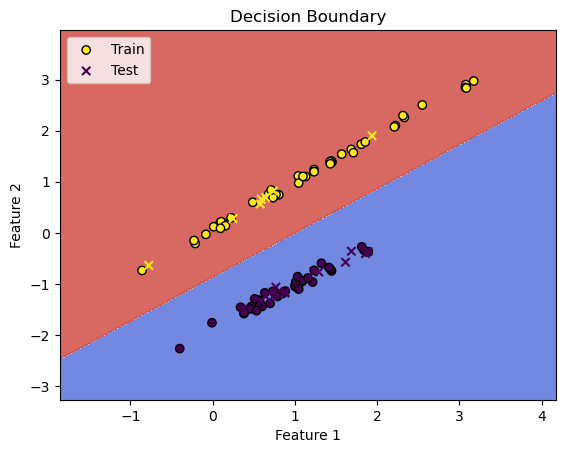

In [58]:
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label='Test')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Interview Questions:

### 1. What are the key hyperparameters in KNN?

##### K-Nearest Neighbors (KNN) is a simple yet powerful machine learning algorithm used for classification and regression tasks. The key hyperparameters in KNN include:

#### 1.Number of Neighbors (k):
#####    The number of nearest neighbors to consider for determining the output.
#####    A smaller 𝑘 makes the model sensitive to noise, while a larger 𝑘 smoothens the decision boundary but may overlook local patterns.
#### 2.Distance Metric:
#####    Determines how the "closeness" between points is calculated. Common options include: 
#####    Minkowski Distance: A generalization of both, with a tunable parameter 𝑝.
#### 3.Weighting of Neighbors:
#####     Determines whether all neighbors contribute equally or weighted by their distance: 
#####     Uniform Weight: All neighbors have equal importance.
#####     Distance Weight: Closer neighbors have more influence.
#### 4.Algorithm for Nearest Neighbor Search:
#####     Determines how the neighbors are found efficiently:
#####     Ball Tree: Suitable for low-dimensional data.   
#####     KD-Tree: Effective for moderate dimensions.
#### 5.Leaf Size (for Ball Tree or KD-Tree):
#####     Affects the efficiency of the search algorithm. Larger values reduce the tree-building time but may slow down queries.
#### 6.P Parameter (for Minkowski Distance):
#####     Defines the power parameter of the Minkowski metric:
#### 7.Number of Jobs (𝑛_jobs):
#####     Specifies the number of parallel jobs to speed up computation. Useful for large datasets.
#### 8.Metric Parameters:
#####     Additional parameters specific to the chosen distance metric. For example, custom metrics may have their own tunable hyperparameters.

### 2. What distance metrics can be used in KNN?

#### The k-Nearest Neighbors (KNN) algorithm relies on a distance metric to measure the similarity between data points. Different distance metrics can be used depending on the nature of the data and the problem. Here are the most common distance metrics:

#### 1. Euclidean Distance
#####   Description: This is the most common metric, measuring the straight-line distance between two points in n-dimensional space.
#####   Use case: Suitable for continuous numerical data.
#### 2. Manhattan Distance (L1 Norm)
#####   Description: Measures the distance between two points by summing the absolute differences of their coordinates.
#####   Use case: Works well when data dimensions are independent and have different units or scales.
#### 3. Bray-Curtis Distance
#####   Description: Quantifies the compositional dissimilarity between two distributions.
#####   Use case: Commonly used in ecological and environmental data analysis.
#### 4. Jaccard Distance
#####   Description: Measures dissimilarity between sets as the complement of their overlap.
#####   Use case: Useful for comparing sets or binary data.
#### 5. Chebyshev Distance  
#####   Description: Measures the greatest absolute difference along any dimension.
#####   Use case: Useful in problems where movement is restricted along grid-like paths (e.g., chessboard distance).
#### 6. Hamming Distance
#####   Description: Counts the number of differing components between two categorical or binary vectors.
#####   Use case: Suitable for categorical, binary, or string data.
 